<a href="https://colab.research.google.com/github/Kasthlen/kasthlen-aprendizaje-no-supervisado/blob/main/kasthlen_clustering_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importar librerias


In [1]:
# Para manipulación de datos
import pandas as pd
import numpy as np

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para clustering y preprocesamiento de scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print("¡Librerías importadas correctamente!")

¡Librerías importadas correctamente!


#2. Cargar un conjunto de datos

In [2]:
# URL del dataset de setas. Es un archivo .data, pero se puede leer como un CSV.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

# Los nombres de las columnas no vienen en el archivo, así que los definimos nosotros.
# La primera columna es la clase ('p' = poisonous, 'e' = edible)
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                'ring-type', 'spore-print-color', 'population', 'habitat']

# Cargamos los datos usando pandas, indicando que no hay encabezado y asignando nuestros nombres
df = pd.read_csv(url, header=None, names=column_names)

print("Dataset de Setas cargado correctamente.")
df.head()

Dataset de Setas cargado correctamente.


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#3. Exploración Básica de los Datos

In [3]:
# Mostramos información general del DataFrame (tipos de datos, si hay nulos, etc.)
print("Información general del DataFrame:")
df.info()

print("\n" + "="*50 + "\n")

# Mostramos estadísticas descriptivas (media, desviación estándar, etc.)
print("Estadísticas descriptivas:")
df.describe()

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   o

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#4. Preprocesamiento de datos


In [6]:
# Contamos cuántas veces aparece cada valor en la columna 'stalk-root'
print("Valores en la columna 'stalk-root':")
df['stalk-root'].value_counts()

Valores en la columna 'stalk-root':


,count
stalk-root,
b,3776
?,2480
e,1120
c,556
r,192


4.2 convertir el texto (variables) a numeros "Codificación"

In [7]:
# Primero, separamos la columna 'class' (nuestro objetivo) de las características
X = df.drop('class', axis=1)
y = df['class']

# Ahora, convertimos todas las columnas de características a formato numérico
X_encoded = pd.get_dummies(X)

print("¡Los datos han sido transformados a formato numérico!")
X_encoded.head()

¡Los datos han sido transformados a formato numérico!


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


4.3 Codificación a Enteros (0 y 1)

In [8]:
# URL del dataset de setas. Es un archivo .data, pero se puede leer como un CSV.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

# Los nombres de las columnas no vienen en el archivo, así que los definimos nosotros.
# La primera columna es la clase ('p' = poisonous, 'e' = edible)
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                'ring-type', 'spore-print-color', 'population', 'habitat']

# Cargamos los datos usando pandas, indicando que no hay encabezado y asignando nuestros nombres
df = pd.read_csv(url, header=None, names=column_names)

# Primero, separamos la columna 'class' (nuestro objetivo) de las características
X = df.drop('class', axis=1)
y = df['class']

# Ahora, convertimos todas las columnas a formato numérico, especificando que queremos enteros
X_encoded = pd.get_dummies(X, dtype=int)

print("¡Los datos han sido transformados a formato numérico (0s y 1s)!")
X_encoded.head()

¡Los datos han sido transformados a formato numérico (0s y 1s)!


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


#6. Reducción de Dimensionalidad con PCA (Análisis de Componentes Principales)


In [9]:
from sklearn.decomposition import PCA

# Creamos una instancia de PCA, pidiéndole que encuentre los 2 componentes principales
pca = PCA(n_components=2)

# Aplicamos PCA a nuestros datos codificados.
# .fit_transform() aprende la transformación y la aplica al mismo tiempo.
X_pca = pca.fit_transform(X_encoded)

# El resultado X_pca es un array de NumPy. Vamos a convertirlo a un DataFrame de pandas
# para que sea más fácil de visualizar y manejar.
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

# Para poder colorear nuestro futuro gráfico, vamos a añadir la clase original (venenosa/comestible)
# a este nuevo DataFrame.
# Usamos .values para evitar problemas de alineación de índices.
df_pca['class'] = y.values

print("¡Reducción de dimensionalidad con PCA completada!")
df_pca.head()

¡Reducción de dimensionalidad con PCA completada!


,Componente Principal 1,Componente Principal 2,class
0,0.996245,-0.946892,p
1,1.441733,-0.164154,e
2,1.524085,-0.408746,e
3,1.151800,-0.675820,p
4,0.617503,-0.996143,e


6.2 Visualizar los resultados de PCA


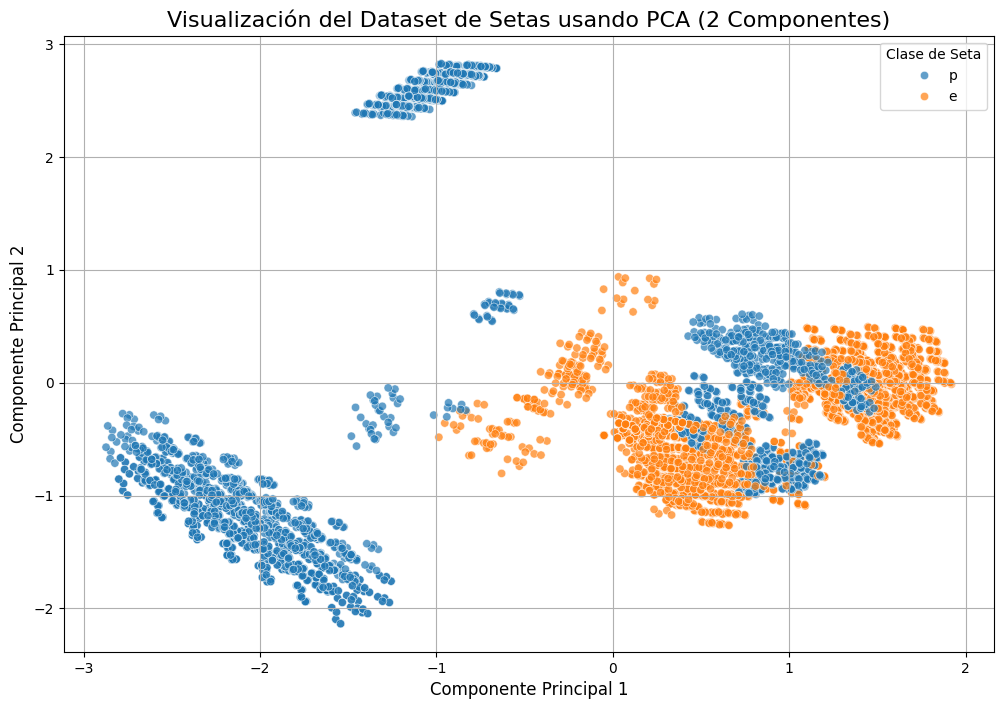

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='class', data=df_pca, alpha=0.7)

plt.title('Visualización del Dataset de Setas usando PCA (2 Componentes)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Clase de Seta')
plt.grid(True)
plt.show()

#7. Aplicar Clustering con K-Means


7.1. Entrenar el modelo

In [11]:
from sklearn.cluster import KMeans

# Seleccionamos los datos que usará K-Means (solo los dos componentes principales)
X_for_kmeans = df_pca[['Componente Principal 1', 'Componente Principal 2']]

# Creamos una instancia de KMeans, pidiéndole que encuentre 2 clusters.
# n_init='auto' es una configuración recomendada para evitar advertencias.
# random_state=42 asegura que obtengamos los mismos resultados si lo ejecutamos de nuevo.
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)

# Entrenamos el modelo con nuestros datos
kmeans.fit(X_for_kmeans)

# Obtenemos las etiquetas de cluster que el algoritmo asignó a cada seta (0 o 1)
cluster_labels = kmeans.labels_

# Añadimos estas nuevas etiquetas a nuestro DataFrame para poder visualizarlas
df_pca['cluster_kmeans'] = cluster_labels

print("¡Clustering con K-Means completado!")
df_pca.head()

¡Clustering con K-Means completado!


,Componente Principal 1,Componente Principal 2,class,cluster_kmeans
0,0.996245,-0.946892,p,0
1,1.441733,-0.164154,e,0
2,1.524085,-0.408746,e,0
3,1.151800,-0.675820,p,0
4,0.617503,-0.996143,e,0


7.2. Visualizar los Clusters Encontrados

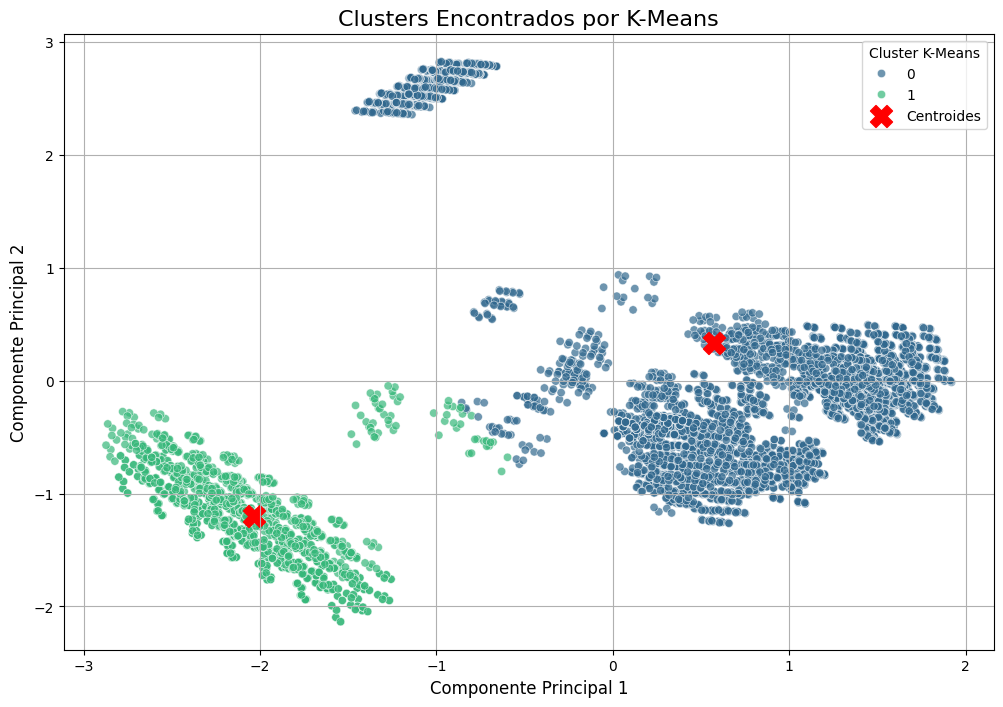

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='cluster_kmeans', data=df_pca, alpha=0.7, palette='viridis')

# También podemos dibujar los centroides (los centros de los clusters) que encontró K-Means
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X', label='Centroides')

plt.title('Clusters Encontrados por K-Means', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Cluster K-Means')
plt.grid(True)
plt.show()

#8. Clusters con el Método silhouette


Para n_clusters = 2, el coeficiente de silueta promedio es: 0.5577
Para n_clusters = 3, el coeficiente de silueta promedio es: 0.7633
Para n_clusters = 4, el coeficiente de silueta promedio es: 0.6695
Para n_clusters = 5, el coeficiente de silueta promedio es: 0.6465
Para n_clusters = 6, el coeficiente de silueta promedio es: 0.5956
Para n_clusters = 7, el coeficiente de silueta promedio es: 0.5477
Para n_clusters = 8, el coeficiente de silueta promedio es: 0.5154
Para n_clusters = 9, el coeficiente de silueta promedio es: 0.4786
Para n_clusters = 10, el coeficiente de silueta promedio es: 0.4670


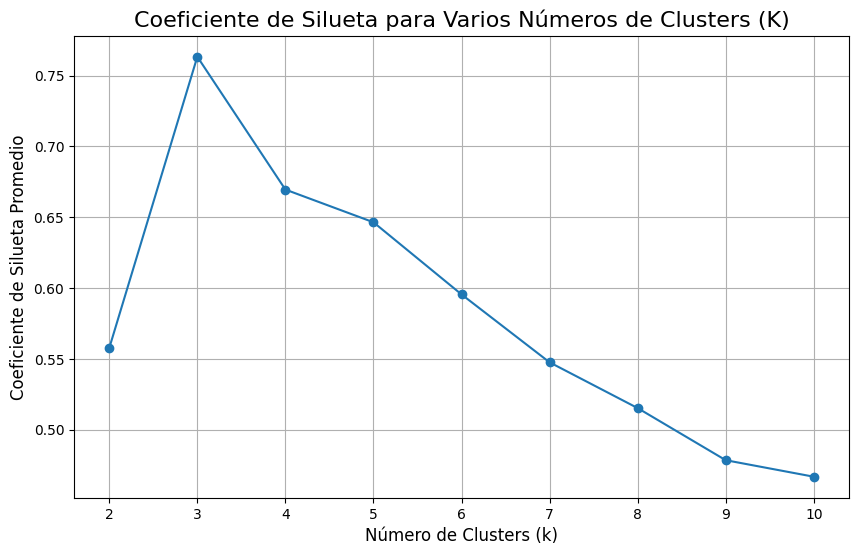

In [13]:
from sklearn.metrics import silhouette_score

# Usaremos los datos que ya preparamos para K-Means
X_for_clustering = df_pca[['Componente Principal 1', 'Componente Principal 2']]

# Probaremos desde 2 hasta 10 clusters
range_n_clusters = range(2, 11)
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    # Creamos y entrenamos el modelo K-Means para el número actual de clusters
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    cluster_labels = kmeans.fit_predict(X_for_clustering)

    # Calculamos el coeficiente de silueta promedio para esta solución
    silhouette_avg = silhouette_score(X_for_clustering, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

    print(f"Para n_clusters = {n_clusters}, el coeficiente de silueta promedio es: {silhouette_avg:.4f}")

# Ahora, vamos a visualizar los resultados para encontrar el mejor
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Coeficiente de Silueta para Varios Números de Clusters (K)', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Coeficiente de Silueta Promedio', fontsize=12)
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

#9. Solución Óptima con k=3

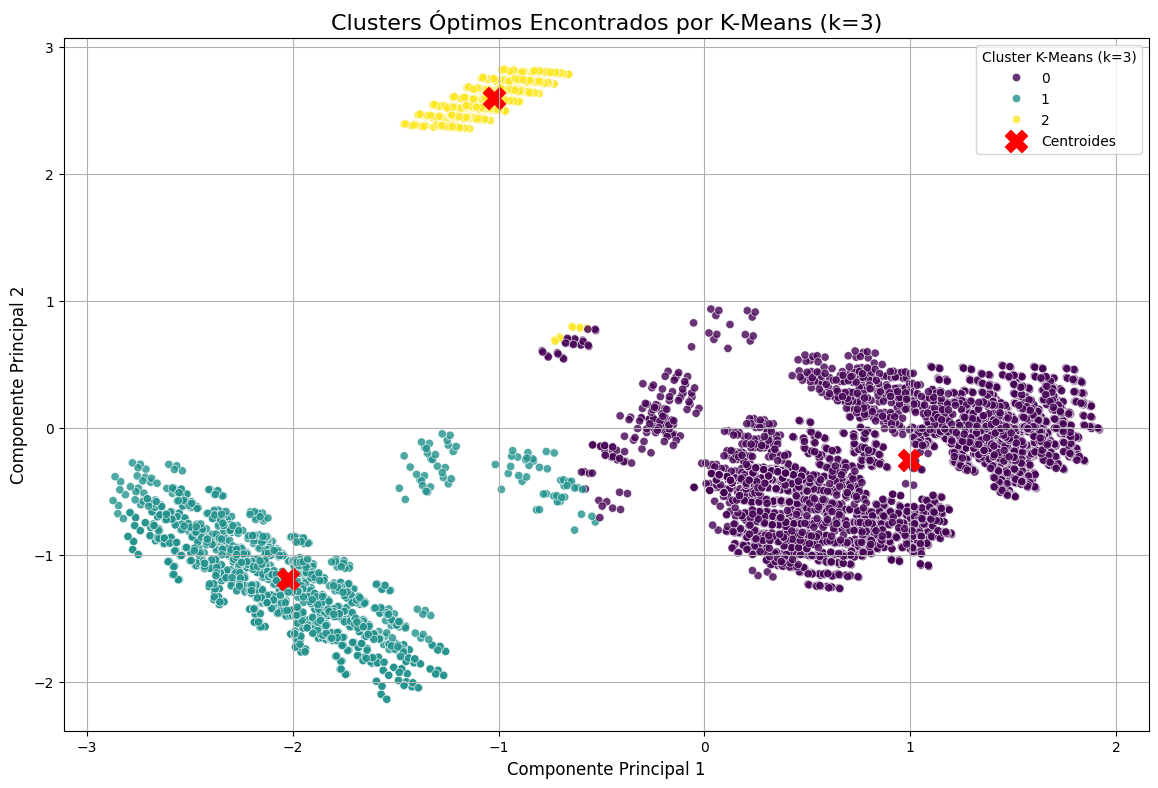

In [14]:
# Creamos y entrenamos el modelo K-Means con el número óptimo de clusters
kmeans_optimal = KMeans(n_clusters=3, n_init='auto', random_state=42)
cluster_labels_optimal = kmeans_optimal.fit_predict(X_for_kmeans)

# Añadimos estas nuevas etiquetas a un nuevo DataFrame para no sobreescribir el anterior
df_pca['cluster_kmeans_optimal'] = cluster_labels_optimal

# Visualizamos el resultado
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='cluster_kmeans_optimal', data=df_pca, alpha=0.8, palette='viridis')

# Dibujamos los centroides
centers_optimal = kmeans_optimal.cluster_centers_
plt.scatter(centers_optimal[:, 0], centers_optimal[:, 1], c='red', s=250, marker='X', label='Centroides')

plt.title('Clusters Óptimos Encontrados por K-Means (k=3)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Cluster K-Means (k=3)')
plt.grid(True)
plt.show()

#Analisis de datos 2.0


1. Tabla de contingencia (clusters vs clase real) y “pureza” por cluster

In [15]:
# Contingencia entre clusters y etiquetas reales
ct = pd.crosstab(df_pca['cluster_kmeans_optimal'], df_pca['class'])
print("Tabla de contingencia (cluster x class):")
print(ct)

# Pureza global: sum(max_por_cluster) / N
max_per_cluster = ct.max(axis=1).sum()
purity = max_per_cluster / ct.values.sum()
print(f"\nPureza global: {purity:.4f}")

Tabla de contingencia (cluster x class):
class                      e     p
cluster_kmeans_optimal            
0                       4173   843
1                         35  1768
2                          0  1305

Pureza global: 0.8919


2. Métricas de comparación entre clusterings y etiquetas (Adjusted Rand, AMI)

In [16]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

ari = adjusted_rand_score(df_pca['class'], df_pca['cluster_kmeans_optimal'])
ami = adjusted_mutual_info_score(df_pca['class'], df_pca['cluster_kmeans_optimal'])
sil = silhouette_score(X_for_kmeans, df_pca['cluster_kmeans_optimal'])

print(f"ARI: {ari:.4f}")
print(f"AMI: {ami:.4f}")
print(f"Silhouette (k=3): {sil:.4f}")

ARI: 0.4773
AMI: 0.4841
Silhouette (k=3): 0.7633


3. Inspeccionar características representativas de cada cluster (en espacio original codificado)

In [17]:
# Usamos X_encoded (matriz one-hot) para ver promedios por cluster
X_with_cluster = X_encoded.copy()
X_with_cluster['cluster'] = df_pca['cluster_kmeans_optimal'].values

# Media de cada feature (0/1) por cluster → qué categorías son más frecuentes
cluster_means = X_with_cluster.groupby('cluster').mean().T

# Mostrar las top 5 características más “fuertes” por cluster
for cl in sorted(X_with_cluster['cluster'].unique()):
    top_feats = cluster_means[cl].sort_values(ascending=False).head(10)
    print(f"\nTop features para cluster {cl}:")
    print(top_feats)



Top features para cluster 0:
veil-type_p                   1.000000
veil-color_w                  0.961722
gill-attachment_f             0.958931
ring-number_o                 0.875000
gill-size_b                   0.858652
stalk-surface-above-ring_s    0.857057
stalk-surface-below-ring_s    0.809011
ring-type_p                   0.791069
gill-spacing_c                0.747010
stalk-color-above-ring_w      0.704346
Name: 0, dtype: float64

Top features para cluster 1:
bruises_f              1.000000
gill-attachment_f      1.000000
gill-size_n            1.000000
spore-print-color_w    1.000000
veil-type_p            1.000000
ring-number_o          1.000000
ring-type_e            1.000000
population_v           0.995563
veil-color_w           0.995563
stalk-root_?           0.976151
Name: 1, dtype: float64

Top features para cluster 2:
bruises_f                     1.000000
gill-size_b                   1.000000
stalk-shape_e                 1.000000
gill-spacing_c                1.000

4. Casos "mal asignados"

In [18]:
# Misclassified examples (cluster predicho vs clase real)
misclassified = df_pca[df_pca['cluster_kmeans_optimal'] != df_pca['class'].map({'e':0,'p':1})]  # si mappeaste clusters igual a clases, si no ver abajo alternativa
# Mejor: ver por cluster los casos de 'e' en clusters de 'p' y viceversa:
ct = pd.crosstab(df_pca['cluster_kmeans_optimal'], df_pca['class'])
print(ct)
# Para ver índices de ejemplos comestibles en clusters 1 o 2:
comestibles_en_ven = df_pca[(df_pca['class']=='e') & (df_pca['cluster_kmeans_optimal'].isin([1,2]))].index
print("Ejemplos comestibles en clusters 1/2:", len(comestibles_en_ven))

class                      e     p
cluster_kmeans_optimal            
0                       4173   843
1                         35  1768
2                          0  1305
Ejemplos comestibles en clusters 1/2: 35


 **4.1. Inspeccionar los casos**

Objetivo: entender por qué 35 comestibles caen en clusters venenosos (revisar sus features).

In [19]:
# Mostrar índices y ejemplos mal asignados (comestibles en clusters 1 o 2)
misclass_idx = df_pca[(df_pca['class']=='e') & (df_pca['cluster_kmeans_optimal'].isin([1,2]))].index
print("Número de comestibles en clusters 1/2:", len(misclass_idx))
display(df.loc[misclass_idx].head(20))   # ver hasta 20 ejemplos
# También ver sus posiciones en el espacio PCA
display(df_pca.loc[misclass_idx].head(20))

Número de comestibles en clusters 1/2: 35


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4165,e,f,f,c,f,n,f,w,n,w,...,f,w,n,p,w,o,e,w,v,l
4276,e,k,y,n,f,n,f,w,n,w,...,f,w,n,p,w,o,e,w,v,l
4834,e,k,y,n,f,n,f,w,n,w,...,s,w,n,p,w,o,e,w,v,l
5087,e,k,f,c,f,n,f,w,n,w,...,s,w,n,p,w,o,e,w,v,l
5109,e,f,y,c,f,n,f,w,n,w,...,s,w,n,p,w,o,e,w,v,l
5117,e,k,y,c,f,n,f,w,n,w,...,f,w,n,p,w,o,e,w,v,l
5122,e,k,y,c,f,n,f,w,n,w,...,s,w,n,p,w,o,e,w,v,l
5148,e,f,f,n,f,n,f,w,n,w,...,f,w,n,p,w,o,e,w,v,l
5178,e,x,y,c,f,n,f,w,n,w,...,f,w,n,p,w,o,e,w,v,l
5185,e,f,y,c,f,n,f,w,n,w,...,f,w,n,p,w,o,e,w,v,l


,Componente Principal 1,Componente Principal 2,class,cluster_kmeans,cluster_kmeans_optimal
4165,-0.768038,-0.184353,e,0,1
4276,-0.986600,-0.482697,e,1,1
4834,-0.815754,-0.644230,e,1,1
5087,-0.681445,-0.454865,e,0,1
5109,-0.697931,-0.410058,e,0,1
5117,-0.768115,-0.516663,e,1,1
5122,-0.782185,-0.519037,e,1,1
5148,-0.616690,-0.468704,e,0,1
5178,-0.830392,-0.259336,e,0,1
5185,-0.683862,-0.407683,e,0,1


5. Inspeccionar la columna stalk-root por cluster

In [20]:
# Conteos de stalk-root por cluster
temp = df.copy()
temp['cluster'] = df_pca['cluster_kmeans_optimal'].values
for c in sorted(temp['cluster'].unique()):
    print(f"\nCluster {c} - stalk-root counts:")
    print(temp[temp['cluster']==c]['stalk-root'].value_counts())


Cluster 0 - stalk-root counts:
stalk-root
b    2445
e    1120
?     720
c     539
r     192
Name: count, dtype: int64

Cluster 1 - stalk-root counts:
stalk-root
?    1760
b      35
c       8
Name: count, dtype: int64

Cluster 2 - stalk-root counts:
stalk-root
b    1296
c       9
Name: count, dtype: int64


5.1. eliminar stalk-root (alternativa) y comparar métricas

In [21]:
# quitar stalk-root y repetir pipeline
df_no_sr = df.drop(columns=['stalk-root'])
X_no_sr = pd.get_dummies(df_no_sr.drop('class', axis=1), dtype=int)

pca_no_sr = PCA(n_components=2)
X_pca_no_sr = pca_no_sr.fit_transform(X_no_sr)
kmeans_no_sr = KMeans(n_clusters=3, n_init='auto', random_state=42).fit(X_pca_no_sr)
labels_no_sr = kmeans_no_sr.labels_

from sklearn.metrics import silhouette_score, adjusted_rand_score
print("Silhouette (sin stalk-root):", silhouette_score(X_pca_no_sr, labels_no_sr))
y_num = df['class'].map({'e':0,'p':1}).values
print("ARI (sin stalk-root):", adjusted_rand_score(y_num, labels_no_sr))

Silhouette (sin stalk-root): 0.7758251598137175
ARI (sin stalk-root): 0.48097859767336004


5.2 missing vs categoría

In [22]:
# 2A: convertir '?' a NaN e imputar por moda (por ejemplo)
df_impute = df.copy()
df_impute['stalk-root'] = df_impute['stalk-root'].replace('?', np.nan)

# imputar por la categoría más frecuente
mode = df_impute['stalk-root'].mode()[0]
df_impute['stalk-root'] = df_impute['stalk-root'].fillna(mode)

# One-hot y pipeline
X_impute = pd.get_dummies(df_impute.drop('class', axis=1), dtype=int)
pca = PCA(n_components=2)
X_pca_impute = pca.fit_transform(X_impute)
kmeans_impute = KMeans(n_clusters=3, n_init='auto', random_state=42).fit(X_pca_impute)
labels_impute = kmeans_impute.labels_

from sklearn.metrics import silhouette_score, adjusted_rand_score
print("Silhouette (imputado):", silhouette_score(X_pca_impute, labels_impute))
y_num = df['class'].map({'e':0,'p':1}).values
print("ARI (imputado):", adjusted_rand_score(y_num, labels_impute))

Silhouette (imputado): 0.7846757099642836
ARI (imputado): 0.47897296518075294


6. Eliminar columnas constantes y volver a PCA

In [23]:
# Eliminar columnas constantes (ej. veil-type si tiene una sola categoría)
nunique = df.nunique()
const_cols = nunique[nunique==1].index.tolist()
print("Columnas constantes:", const_cols)

df2 = df.drop(columns=const_cols)
X = pd.get_dummies(df2.drop('class', axis=1), dtype=int)
# Luego PCA y KMeans como antes

Columnas constantes: ['veil-type']


7. Volver a calcular clusters sin columnas poco informativas y comparar

In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score

# suponiendo X ya como get_dummies sin constantes
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X)
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42).fit(X_pca2)
labels = kmeans.labels_

print("Silhouette:", silhouette_score(X_pca2, labels))
# comparar con class original
# mappear class 'e'/'p' a números para ARI/AMI
y_num = df['class'].map({'e':0,'p':1}).values
print("ARI:", adjusted_rand_score(y_num, labels))
print("AMI:", adjusted_mutual_info_score(y_num, labels))

Silhouette: 0.7632728054324978
ARI: 0.4773446471351254
AMI: 0.4840586484157369


8. Probar otros algoritmos (Agglomerative y DBSCAN)

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Agglomerative (k=3)
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X_pca2)
print("Silhouette (agglo):", silhouette_score(X_pca2, labels_agg))

# DBSCAN (puede detectar outliers; hay que ajustar eps/min_samples)
db = DBSCAN(eps=0.5, min_samples=5).fit(X_pca2)
labels_db = db.labels_
# labels_db == -1 son outliers; calificar silhouette solo si hay >1 cluster
import numpy as np
if len(set(labels_db)) - ( -1 in labels_db ) > 1:
    print("Silhouette (DBSCAN):", silhouette_score(X_pca2, labels_db))
else:
    print("DBSCAN encontró <2 clusters (ajusta eps/min_samples).")

Silhouette (agglo): 0.7593344032764563
Silhouette (DBSCAN): 0.7593344032764563


9. Interpretación automática de features

In [26]:
features_to_check = ['odor', 'stalk-root', 'gill-size', 'ring-type', 'population']
for f in features_to_check:
    print("\nFeature:", f)
    display(pd.crosstab(df[f], df_pca['cluster_kmeans_optimal'], normalize='columns'))


Feature: odor


cluster_kmeans_optimal,0,1,2
odor,,,
a,0.079745,0.000000,0.000000
c,0.038278,0.000000,0.000000
f,0.057416,0.319468,0.993103
l,0.079745,0.000000,0.000000
m,0.005383,0.000000,0.006897
n,0.688397,0.041597,0.000000
p,0.051037,0.000000,0.000000
s,0.000000,0.319468,0.000000
y,0.000000,0.319468,0.000000



Feature: stalk-root


cluster_kmeans_optimal,0,1,2
stalk-root,,,
?,0.143541,0.976151,0.000000
b,0.487440,0.019412,0.993103
c,0.107456,0.004437,0.006897
e,0.223285,0.000000,0.000000
r,0.038278,0.000000,0.000000



Feature: gill-size


cluster_kmeans_optimal,0,1,2
gill-size,,,
b,0.858652,0.0,1.0
n,0.141348,1.0,0.0



Feature: ring-type


cluster_kmeans_optimal,0,1,2
ring-type,,,
e,0.193979,1.0,0.000000
f,0.009569,0.0,0.000000
l,0.000000,0.0,0.993103
n,0.005383,0.0,0.006897
p,0.791069,0.0,0.000000



Feature: population


cluster_kmeans_optimal,0,1,2
population,,,
a,0.076555,0.000000,0.000000
c,0.064394,0.004437,0.006897
n,0.079745,0.000000,0.000000
s,0.248804,0.000000,0.000000
v,0.318381,0.995563,0.496552
y,0.212121,0.000000,0.496552


10. Comparar la tabla de contingencia después de imputar

In [27]:
# Si kmeans_impute y labels_impute vienen del pipeline imputado
df_pca_impute = pd.DataFrame(X_pca_impute, columns=['Componente Principal 1','Componente Principal 2'])
df_pca_impute['class'] = df['class'].values
df_pca_impute['cluster_kmeans_impute'] = labels_impute

ct_impute = pd.crosstab(df_pca_impute['cluster_kmeans_impute'], df_pca_impute['class'])
print("Contingencia (imputado):")
print(ct_impute)

# Pureza
max_per_cluster = ct_impute.max(axis=1).sum()
purity = max_per_cluster / ct_impute.values.sum()
print(f"Pureza (imputado): {purity:.4f}")

Contingencia (imputado):
class                     e     p
cluster_kmeans_impute            
0                      4160   823
1                        48  1767
2                         0  1326
Pureza (imputado): 0.8928


 11. ejemplos mal asignados tras la imputación

In [28]:
misclass_idx_impute = df_pca_impute[(df_pca_impute['class']=='e') & (df_pca_impute['cluster_kmeans_impute'].isin([1,2]))].index
print("Comestibles mal asignados (imputado):", len(misclass_idx_impute))
display(df.loc[misclass_idx_impute, ['stalk-root','odor','gill-size','ring-type','population']].head(20))
display(df_pca_impute.loc[misclass_idx_impute, ['Componente Principal 1','Componente Principal 2']].head(20))

Comestibles mal asignados (imputado): 48


,stalk-root,odor,gill-size,ring-type,population
4165,b,n,n,e,v
4276,b,n,n,e,v
4491,b,n,n,e,v
4834,b,n,n,e,v
4930,b,n,n,e,v
5087,b,n,n,e,v
5109,b,n,n,e,v
5117,b,n,n,e,v
5122,b,n,n,e,v
5148,b,n,n,e,v


,Componente Principal 1,Componente Principal 2
4165,-0.763765,0.517067
4276,-0.894091,0.871228
4491,-0.548826,0.635379
4834,-0.695086,1.005143
4930,-0.505990,0.759609
5087,-0.612450,0.762041
5109,-0.646073,0.751859
5117,-0.677829,0.847316
5122,-0.693763,0.862918
5148,-0.550149,0.777604


#Entrenar RandomForest

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Usa X_impute (o X_encoded) según prefieras; aquí X_impute es la matriz con stalk-root imputado
X = X_impute
y = df['class'].map({'e':0,'p':1}).values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
try:
    print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
except:
    pass

# Top importancias
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
display(importances.head(30))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1052
           1       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

ROC AUC: 1.0


,0
odor_n,0.121510
odor_f,0.067092
gill-size_n,0.059186
gill-size_b,0.054385
spore-print-color_h,0.044764
gill-color_b,0.043436
stalk-surface-below-ring_k,0.042746
stalk-surface-above-ring_k,0.038025
ring-type_p,0.033375
bruises_f,0.025464


1. Matriz de confusión y métricas detalladas

Accuracy: 1.0

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1052
           1       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



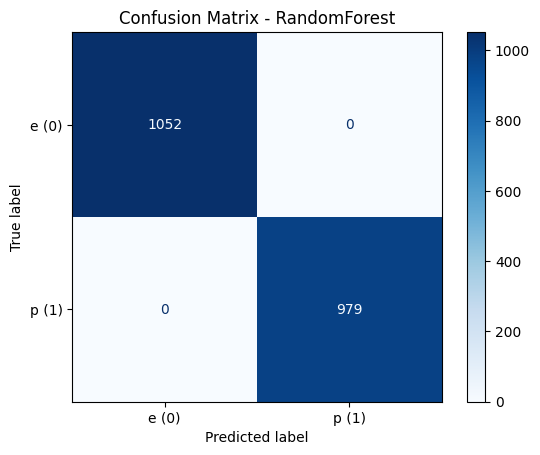

ROC AUC: 1.0


In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, classification_report

# Asumiendo X_test, y_test, y_pred del RF ya están en el entorno
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['e (0)','p (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - RandomForest')
plt.show()

# ROC AUC --> predict_proba
try:
    auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
    print("ROC AUC:", auc)
except Exception as e:
    print("No se pudo calcular ROC AUC:", e)

2. Visualizar y guardar las top importancias

,importance
odor_n,0.121510
odor_f,0.067092
gill-size_n,0.059186
gill-size_b,0.054385
spore-print-color_h,0.044764
gill-color_b,0.043436
stalk-surface-below-ring_k,0.042746
stalk-surface-above-ring_k,0.038025
ring-type_p,0.033375
bruises_f,0.025464


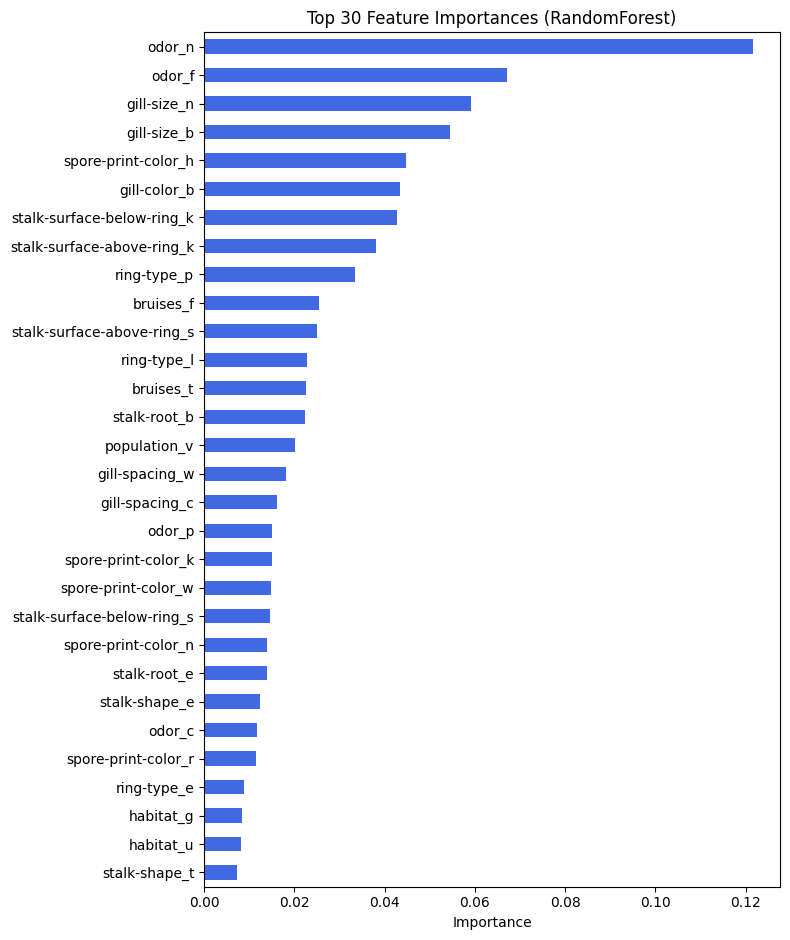

Guardadas top importances en rf_top_importances.csv


In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

top_n = 30
top_importances = importances.head(top_n)

# Tabla
display(top_importances.to_frame(name='importance'))

# Gráfico horizontal
plt.figure(figsize=(8, min(0.25*top_n + 2, 12)))
top_importances.sort_values().plot.barh(color='royalblue')
plt.title(f'Top {top_n} Feature Importances (RandomForest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Guardar a CSV
top_importances.to_csv('rf_top_importances.csv')
print("Guardadas top importances en rf_top_importances.csv")

3. Exportar ejemplos mal clasificados

In [32]:
# Reusar misclass_idx_impute
# asumimos df y df_pca_impute están disponibles

# Obtener predicciones para todo el dataset:
full_pred = rf.predict(X)  # cuidado: X aquí es la matriz completa que usaste al entrenar (X_impute)
df_results = df.copy()
df_results['y_true'] = y
df_results['y_pred'] = full_pred
# Map numeric to labels
df_results['y_true_label'] = df_results['y_true'].map({0:'e',1:'p'})
df_results['y_pred_label'] = df_results['y_pred'].map({0:'e',1:'p'})

mis_df = df_results[df_results['y_true_label'] != df_results['y_pred_label']]
print("Número de mal clasificados (supervisado RF):", len(mis_df))
display(mis_df.head(30))

# Guardar a CSV
mis_df.to_csv('rf_misclassified_full.csv', index=True)
print("Guardados en rf_misclassified_full.csv")

Número de mal clasificados (supervisado RF): 0


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,veil-color,ring-number,ring-type,spore-print-color,population,habitat,y_true,y_pred,y_true_label,y_pred_label


Guardados en rf_misclassified_full.csv


4. Cross-validation para obtener métricas más robustas

In [33]:
from sklearn.model_selection import GridSearchCV

# Definimos una cuadrícula de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200], # Número de árboles en el bosque
    'max_depth': [None, 10, 20], # Profundidad máxima del árbol (None significa nodos expandidos hasta que todas las hojas sean puras o hasta que contengan menos de min_samples_split muestras)
    'min_samples_split': [2, 5], # Número mínimo de muestras requeridas para dividir un nodo interno
    'max_features': ['sqrt', 0.5] # Número de características a considerar al buscar la mejor división ('sqrt' es la raíz cuadrada del total de características, 0.5 es el 50% del total)
}

# Creamos una instancia del clasificador RandomForest con estado aleatorio para reproducibilidad y usando todos los núcleos de la CPU
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# Configuramos GridSearchCV para buscar la mejor combinación de hiperparámetros
# cv=3: Usamos validación cruzada con 3 folds
# scoring='roc_auc': La métrica a optimizar es el área bajo la curva ROC
# n_jobs=-1: Usar todos los núcleos de la CPU
# verbose=2: Muestra información detallada durante la búsqueda
grid = GridSearchCV(rf_base, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

# Entrenamos el GridSearchCV en los datos de entrenamiento para encontrar los mejores hiperparámetros
grid.fit(X_train, y_train)

# Mostramos el mejor score (ROC AUC) encontrado
print("Mejor score (ROC AUC):", grid.best_score_)
# Mostramos la combinación de hiperparámetros que dio el mejor score
print("Mejores parámetros:", grid.best_params_)

# Obtenemos el mejor modelo entrenado directamente desde el resultado de GridSearchCV
best_rf = grid.best_estimator_

# Evaluamos el mejor modelo en el conjunto de prueba
y_pred_best = best_rf.predict(X_test)

# Imprimimos la precisión del mejor modelo en el conjunto de prueba
print("Accuracy (best):", accuracy_score(y_test, y_pred_best))

# Intentamos imprimir el ROC AUC del mejor modelo en el conjunto de prueba
try:
    print("ROC AUC (best):", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))
except:
    # Si hay un error (por ejemplo, si el modelo no tiene predict_proba), lo ignoramos
    pass

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejor score (ROC AUC): 1.0
Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Accuracy (best): 1.0
ROC AUC (best): 1.0


5. Búsqueda de hiperparámetros (GridSearchCV rápido)

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 0.5]
}

rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
grid = GridSearchCV(rf_base, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Mejor score (ROC AUC):", grid.best_score_)
print("Mejores parámetros:", grid.best_params_)

best_rf = grid.best_estimator_
# Evaluar en test
y_pred_best = best_rf.predict(X_test)
print("Accuracy (best):", accuracy_score(y_test, y_pred_best))
try:
    print("ROC AUC (best):", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))
except:
    pass

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejor score (ROC AUC): 1.0
Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Accuracy (best): 1.0
ROC AUC (best): 1.0


6. Explicabilidad con SHAP

In [35]:
import numpy as np
import shap

# usa el modelo entrenado (rf o best_rf) y la muestra que quieres analizar
sample = X_test.sample(n=min(1000, X_test.shape[0]), random_state=42)

explainer = shap.TreeExplainer(rf)   # o shap.Explainer(best_rf, X_train) con versiones nuevas
shap_values = explainer.shap_values(sample)

print("tipo shap_values:", type(shap_values))
# si es lista, mostrar shapes de cada elemento
if isinstance(shap_values, list):
    print("shap_values es lista con longitudes y shapes:")
    for i, arr in enumerate(shap_values):
        print(i, np.asarray(arr).shape)
else:
    arr = np.asarray(shap_values)
    print("shap_values shape:", arr.shape)

print("sample.shape:", sample.shape)
print("sample.columns.shape:", len(sample.columns))
print("X_train/X_test columns equal?:", list(X_train.columns) == list(X_test.columns))

tipo shap_values: <class 'numpy.ndarray'>
shap_values shape: (1000, 116, 2)
sample.shape: (1000, 116)
sample.columns.shape: 116
X_train/X_test columns equal?: True


vesion 2.0

In [43]:
import numpy as np
import shap
import pandas as pd # Importar pandas para Series y DataFrame

# Asegúrate de que best_rf y X_train, X_test estén disponibles del código anterior

# 1. Crear el explicador SHAP
# Usamos el mejor modelo entrenado y los datos de entrenamiento
# Esto puede tardar un poco dependiendo del tamaño de los datos
explainer = shap.Explainer(best_rf, X_train)

# 2. Seleccionar una muestra de los datos de prueba para la explicación
# Es recomendable usar una muestra más pequeña para que el cálculo sea más rápido
sample = X_test.sample(n=min(1000, X_test.shape[0]), random_state=42)

# 3. Calcular los valores SHAP para la muestra seleccionada
# Esto devuelve un objeto Explanation
shap_exp = explainer(sample)

# suponiendo que shap_exp viene de explainer(X_test_sample)
# shap_exp.values shape suele ser (n_samples, n_features) para regresión o (n_samples, n_features, n_classes) para multiclase
import numpy as np
# Si es multiclase, tomar la contribución para la clase 1 (venenosa)
vals = shap_exp.values
if vals.ndim == 3:
    # tomar clase 1 (índice 1) — ajusta si tu clase objetivo es otra
    vals_class1 = vals[..., 1]
else:
    # Si es binario y vals.ndim es 2, los valores ya son para la clase positiva por defecto
    vals_class1 = vals

# importancias globales: media de valor absoluto
# Se calcula la importancia de cada característica promediando el valor absoluto de sus valores SHAP
mean_abs = np.mean(np.abs(vals_class1), axis=0)
# Se obtienen los nombres de las características de la muestra
feat_names = sample.columns if hasattr(sample, "columns") else list(X_test.columns)
# Se crea una Serie de pandas con las importancias y los nombres de las características, y se ordena
shap_importances = pd.Series(mean_abs, index=feat_names).sort_values(ascending=False)

print("Importancia de las características según SHAP (media del valor absoluto):")
# Mostrar las top 30 características más importantes según SHAP
display(shap_importances.head(30))

Importancia de las características según SHAP (media del valor absoluto):


,0
odor_n,0.065948
odor_f,0.059235
gill-size_b,0.036799
gill-size_n,0.035726
gill-color_b,0.028433
spore-print-color_h,0.027326
stalk-surface-above-ring_s,0.022949
ring-type_p,0.022611
stalk-surface-above-ring_k,0.021109
stalk-surface-below-ring_k,0.019707


Generando gráfico resumen (beeswarm)...


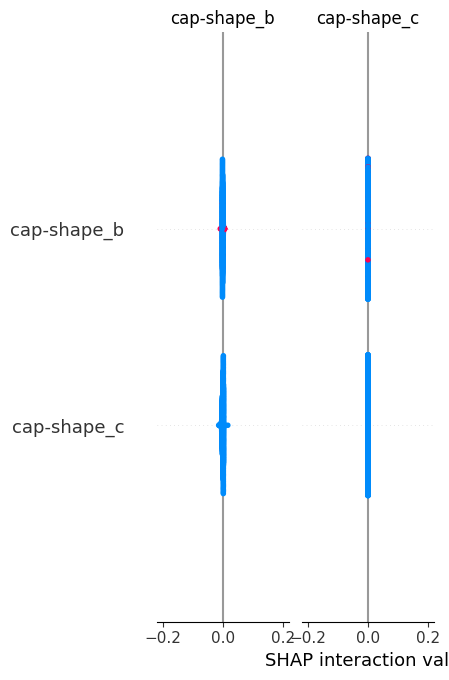

In [39]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Usa el mejor modelo entrenado (best_rf) y los datos de entrenamiento para el explainer
explainer = shap.Explainer(best_rf, X_train)

# Selecciona una muestra de los datos de prueba para la explicación (para que sea más rápido)
# Asegúrate de que la muestra mantenga el mismo orden de columnas que X_train
sample = X_test.sample(n=min(1000, X_test.shape[0]), random_state=42)

# Calcula los valores SHAP para la muestra
# Esto devuelve un objeto Explanation
shap_exp = explainer(sample)

# gráfico resumen (beeswarm) - Muestra la distribución de los valores SHAP por característica
print("Generando gráfico resumen (beeswarm)...")
shap.summary_plot(shap_exp, sample)
plt.show()

# Deshabilitamos el gráfico de barras debido al error. El summary_plot (beeswarm) ya muestra la importancia.
# print("Generando gráfico de barras (importancia global)...")
# shap.plots.bar(shap_exp)
# plt.show()

Característica más importante según SHAP: odor_n


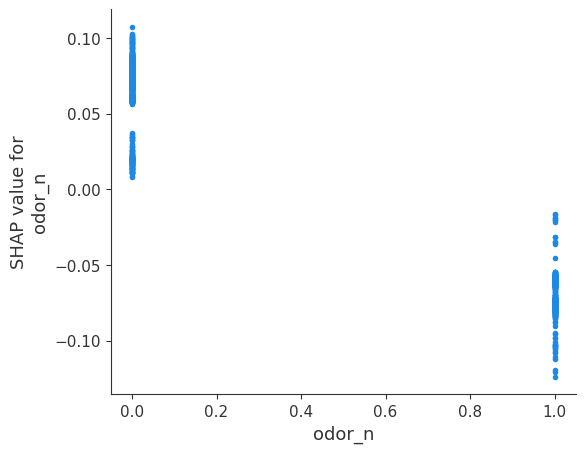

In [40]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de que shap_exp y sample están disponibles del código anterior
# Calcular la importancia de las características a partir de los valores SHAP
# Tomar los valores SHAP para la clase 1 (venenosa) si es multiclase
if shap_exp.values.ndim == 3:
    vals_class1 = shap_exp.values[..., 1]
else:
    vals_class1 = shap_exp.values # Si es binario, los valores ya son para la clase positiva

# Importancias globales: media del valor absoluto de los valores SHAP
mean_abs_shap = np.mean(np.abs(vals_class1), axis=0)
feat_names = sample.columns # Usar los nombres de las columnas de la muestra
shap_importances = pd.Series(mean_abs_shap, index=feat_names).sort_values(ascending=False)

# Obtener la característica principal
top_feat = shap_importances.index[0]

print(f"Característica más importante según SHAP: {top_feat}")

# Generar el gráfico de dependencia para la característica principal
# Usar los valores SHAP para la clase 1 y la muestra de datos
# interaction_index=None para evitar el error anterior
shap.dependence_plot(top_feat, vals_class1, sample, interaction_index=None)
plt.show()

In [42]:
# elegir un índice de ejemplo mal clasificado (ej. el primero en mis_df)

# Verificar si hay ejemplos mal clasificados
if mis_df.empty:
    print("No hay ejemplos mal clasificados para mostrar en el gráfico de fuerza.")
else:
    idx = mis_df.index[0]
    # si usas el objeto shap_exp y sample coincide con X_test rows, puedes hacer:
    # force plot con la API nueva
    explainer = shap.Explainer(rf, X_train)
    # ya lo tienes
    obs = X.loc[[idx]] # fila completa en formato DataFrame
    shap_obs = explainer(obs)

    print(f"Generando gráfico de fuerza para el ejemplo mal clasificado con índice: {idx}")
    # Generar el gráfico de fuerza interactivo en el notebook
    shap.initjs() # Inicializar JavaScript para gráficos interactivos
    shap.force_plot(explainer.expected_value, shap_obs.values, obs)
    # Para guardar como PNG, usa matplotlib workaround (o export to html)
    # shap.save_html('force_plot_example.html', shap.force_plot(explainer.expected_value, shap_obs.values, obs))

No hay ejemplos mal clasificados para mostrar en el gráfico de fuerza.


In [44]:
import matplotlib.pyplot as plt
sample = X_test.sample(n=min(1000, X_test.shape[0]), random_state=42)
plt.figure(figsize=(10,6))
shap.summary_plot(shap_exp, sample, show=False)
plt.savefig('shap_summary.png', dpi=300, bbox_inches='tight')
plt.close()

<Figure size 1000x600 with 0 Axes>

In [45]:
# suponer que df_pca['cluster_kmeans_optimal'] existe y coincide en índices con X
sample_all = X  # o X_test si quieres limitar
explainer_all = shap.Explainer(rf, X_train)
shap_all = explainer_all(sample_all)   # ojo: puede tardar si X es grande

# tomar valores para clase 1
vals = shap_all.values
if vals.ndim == 3:
    vals = vals[..., 1]

shap_df = pd.DataFrame(vals, index=sample_all.index, columns=sample_all.columns)
shap_by_cluster = shap_df.groupby(df_pca['cluster_kmeans_optimal']).mean()
display(shap_by_cluster.T.sort_values(by=0, ascending=False).head(30))  # top para cluster 0

100%|===================| 16241/16248 [02:10<00:00]       

cluster_kmeans_optimal,0,1,2
odor_p,0.004529,-0.000858,-0.000709
spore-print-color_r,0.002981,0.000000,0.000000
cap-color_p,0.000726,0.000000,0.000000
habitat_u,0.000620,0.000748,0.000473
habitat_p,0.000619,-0.000238,-0.000191
habitat_m,0.000438,0.000049,0.000086
odor_c,0.000383,-0.002817,-0.002589
gill-attachment_f,0.000320,0.000796,0.000768
stalk-color-above-ring_o,0.000314,0.001948,0.002045
odor_m,0.000251,0.000000,0.000313


1. Buscar columnas que contengan la etiqueta o nombres sospechosos


In [46]:
# Busca columnas con nombres que sugieran leakage
[x for x in X.columns if 'class' in x.lower() or 'label' in x.lower() or 'target' in x.lower() or 'cluster' in x.lower() or 'componente' in x.lower()]

[]

2. Detectar columnas que por sí solas predicen perfectamente la clase

In [47]:
from sklearn.metrics import roc_auc_score, accuracy_score
leaky_cols = []
for col in X.columns:
    vals = X[col].values
    # Sólo evaluar columnas binarias o categóricas convertidas a dummies
    if len(np.unique(vals)) <= 2:
        # AUC asume probabilidades; para binaria basta usar vals
        try:
            auc = roc_auc_score(y, vals)
            auc = max(auc, 1-auc)  # considerar inversión si columna está 1->e en vez de 1->p
        except:
            auc = 0
        # también comprobar si la columna separa perfectamente
        acc1 = accuracy_score(y, vals)
        acc2 = accuracy_score(y, 1-vals) if set(np.unique(vals))<={0,1} else 0
        best_acc = max(acc1, acc2)
        if auc >= 0.9999 or best_acc == 1.0:
            leaky_cols.append((col, auc, best_acc))
# mostrar
leaky_cols[:50], len(leaky_cols)

([], 0)

3. Comprobar si se anexó la etiqueta accidentalmente (índices / alineación)


In [48]:
# Asegurémonos de que X e y están alineados por índice
print("X shape:", X.shape)
print("y length:", len(y))

# Si X fue creado desde df.get_dummies(drop_first=False) asegúrate que filas y orden coinciden:
# (si X es un DataFrame con índices del original, compara índices)
if hasattr(X, 'index'):
    print("X.index equals df.index?", X.index.equals(df.index))

X shape: (8124, 116)
y length: 8124
X.index equals df.index? True


4. Buscar columnas con relación determinista a la clase (grupos por valor)

In [49]:
# columnas donde cada valor único implica una sola clase (indicador de 'determinismo')
suspect = []
for col in X.columns:
    grouped = pd.crosstab(X[col], df['class'])
    # si para cada valor de la columna la crosstab tiene una sola clase no mezclada -> determinista
    if (grouped.gt(0).sum(axis=1) == 1).all():
        suspect.append(col)
suspect[:50], len(suspect)

([], 0)

 Revisar duplicados entre train y test

In [50]:

intersect = set(X_train.index).intersection(set(X_test.index))
print("Filas compartidas entre train y test (índices):", len(intersect))
# También comprobar duplicados completos
dups = X.duplicated(keep=False).sum()
print("Número de filas duplicadas en todo X:", dups)

Filas compartidas entre train y test (índices): 0
Número de filas duplicadas en todo X: 0


Asegurar que GridSearch/CV no filtra información fuera del fold


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # u otro si usas imputación
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1))
])
param_grid = {
    'clf__n_estimators':[100],
    'clf__max_depth':[None],
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid.fit(X, y)
print("CV best score pipeline:", grid.best_score_)

CV best score pipeline: 1.0


# Comparacion de modelos


In [52]:
# comparar RF feature_importances con SHAP importances
rf_importances = importances  # ya tienes esto: pd.Series(...)
# shap_importances lo calculaste como shap_importances (pd.Series)
comp = pd.DataFrame({
    'rf_importance': rf_importances,
    'shap_importance': shap_importances
}).fillna(0)
comp['rank_rf'] = comp['rf_importance'].rank(ascending=False)
comp['rank_shap'] = comp['shap_importance'].rank(ascending=False)
comp_sorted = comp.sort_values('shap_importance', ascending=False).head(50)
display(comp_sorted.head(30))
print("Correlación entre RF y SHAP (pearson):", comp['rf_importance'].corr(comp['shap_importance']))

,rf_importance,shap_importance,rank_rf,rank_shap
odor_n,0.121510,0.065948,1.0,1.0
odor_f,0.067092,0.059235,2.0,2.0
gill-size_b,0.054385,0.036799,4.0,3.0
gill-size_n,0.059186,0.035726,3.0,4.0
gill-color_b,0.043436,0.028433,6.0,5.0
spore-print-color_h,0.044764,0.027326,5.0,6.0
stalk-surface-above-ring_s,0.025028,0.022949,11.0,7.0
ring-type_p,0.033375,0.022611,9.0,8.0
stalk-surface-above-ring_k,0.038025,0.021109,8.0,9.0
stalk-surface-below-ring_k,0.042746,0.019707,7.0,10.0


Correlación entre RF y SHAP (pearson): 0.9693668033134303


Force plot

In [56]:
# Código robusto para generar y guardar un force plot (maneja binario y multiclase)
import shap
import numpy as np
from IPython.display import display, HTML

# explainer: el Explainer que usaste (por ejemplo explainer = shap.Explainer(best_rf, X_train))
# obs: DataFrame con una fila (ej: obs = X_test.loc[[idx]])
# shap_obs: resultado explainer(obs)

# --- ejemplo: obtén obs y shap_obs si aún no lo tienes ---
idx = X_test.sample(1, random_state=42).index[0]   # o usa el índice que quieras
obs = X_test.loc[[idx]]
shap_obs = explainer(obs)   # Explainer ya definido como shap.Explainer(best_rf, X_train)

# --- extraer base y shap_values en la forma esperada ---
base = explainer.expected_value          # puede ser scalar o array (por clase)
vals = shap_obs.values                    # shape puede ser (1, n_features) o (1, n_features, n_classes)

print("shap_obs.values.shape =", np.asarray(vals).shape)
print("explainer.expected_value shape =", np.shape(base))

# Selección de la clase (si multiclase): elegir la clase de interés (ej. 1 = 'p' venenosa)
if np.asarray(vals).ndim == 3:
    class_index = 1   # ajustar si quieres la clase 0 u otra
    shap_values_to_plot = vals[..., class_index]    # shape (1, n_features)
    base_to_use = base[class_index] if np.ndim(base) > 0 else base
else:
    shap_values_to_plot = vals                      # shape (1, n_features)
    base_to_use = base

# Asegurarnos que shap_values_to_plot tiene shape (1, n_features)
shap_values_to_plot = np.asarray(shap_values_to_plot)

# Llamada correcta a force plot (matplotlib=False para obtener objeto HTML/JS)
force_vis = shap.plots.force(base_to_use, shap_values_to_plot, obs, matplotlib=False)

# Mostrar inline (notebook) - puede mostrarse con display(HTML(...)) o con shap.save_html
try:
    # Guardar como HTML para abrir en el navegador
    shap.save_html('force_plot_example.html', force_vis)
    print("Force plot guardado en 'force_plot_example.html' — ábrelo en tu navegador.")
except Exception as e:
    print("No se pudo guardar con shap.save_html, intentando display directo:", e)
    display(force_vis)

shap_obs.values.shape = (1, 116, 2)
explainer.expected_value shape = (2,)
Force plot guardado en 'force_plot_example.html' — ábrelo en tu navegador.


Generar force plots en lote

In [57]:
# Genera y guarda force plots para una lista de índices
import shap, os
os.makedirs('force_plots', exist_ok=True)

explainer = shap.Explainer(best_rf, X_train)   # usa tu mejor modelo/explainer
probas = best_rf.predict_proba(X_test)[:,1]

# índices frontera (prob ~ 0.45-0.55) y algunos correctamente clasificados/confianza alta
frontera_idx = X_test[(probas>0.45)&(probas<0.55)].sample(n=min(5, len(X_test[(probas>0.45)&(probas<0.55)])), random_state=42).index.tolist()
# si no hay fronteras, tomar ejemplos mal clasificados o aleatorios
if len(frontera_idx) == 0:
    # si existe mis_df (mal clasificados por RF), usarlos
    try:
        frontera_idx = list(mis_df.index[:5])
    except:
        frontera_idx = X_test.sample(n=5, random_state=42).index.tolist()

for i, idx in enumerate(frontera_idx):
    obs = X_test.loc[[idx]]
    shap_obs = explainer(obs)
    # elegir clase 1 (venenosa) si multiclase
    if shap_obs.values.ndim == 3:
        class_index = 1
        shap_vals_plot = shap_obs.values[..., class_index]
        base = explainer.expected_value[class_index]
    else:
        shap_vals_plot = shap_obs.values
        base = explainer.expected_value
    vis = shap.plots.force(base, shap_vals_plot, obs, matplotlib=False)
    outpath = f'force_plots/force_plot_{i}_{idx}.html'
    shap.save_html(outpath, vis)
    print("Guardado:", outpath)

Obtener una explicación textual automática (top features)

In [60]:
# Explicación textual: imprime top contribuyentes con signo
import numpy as np, pandas as pd
idx = X_test.sample(1, random_state=42).index[0]  # sustituye por el índice que quieras
obs = X_test.loc[[idx]]
shap_obs = explainer(obs)
if shap_obs.values.ndim == 3:
    vals = shap_obs.values[..., 1].flatten()
else:
    vals = shap_obs.values.flatten()

shap_series = pd.Series(vals, index=obs.columns).sort_values(key=lambda s: s.abs(), ascending=False)
top = shap_series.head(10)
print("Ejemplo índice:", idx)
for feat, contrib in top.items():
    direction = "aumenta la prob. de venenosa" if contrib > 0 else "disminuye la prob. de venenosa"
    print(f"  {feat}: contribución {contrib:.4f} -> {direction}")

Ejemplo índice: 4550
  odor_f: contribución 0.1193 -> aumenta la prob. de venenosa
  spore-print-color_h: contribución 0.0650 -> aumenta la prob. de venenosa
  odor_n: contribución 0.0622 -> aumenta la prob. de venenosa
  ring-type_l: contribución 0.0514 -> aumenta la prob. de venenosa
  stalk-surface-below-ring_k: contribución 0.0493 -> aumenta la prob. de venenosa
  stalk-surface-above-ring_s: contribución 0.0490 -> aumenta la prob. de venenosa
  stalk-surface-above-ring_k: contribución 0.0443 -> aumenta la prob. de venenosa
  ring-type_p: contribución 0.0266 -> aumenta la prob. de venenosa
  gill-spacing_c: contribución 0.0116 -> aumenta la prob. de venenosa
  gill-spacing_w: contribución 0.0116 -> aumenta la prob. de venenosa


Guardar un CSV con las contribuciones SHAP promedio por cluster (solo el comando para exportar)

In [59]:
shap_by_cluster.to_csv('shap_by_cluster_mean.csv')
print("Guardado shap_by_cluster_mean.csv")

Guardado shap_by_cluster_mean.csv
